## **1. Dataset overview**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


survivalists = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-24/survivalists.csv")
loadouts      = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-24/loadouts.csv")
episodes      = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-24/episodes.csv")
seasons       = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-24/seasons.csv")

survivalists.head()


,season,name,age,gender,city,state,country,result,days_lasted,medically_evacuated,reason_tapped_out,reason_category,team,day_linked_up,profession,url
0,1,Alan Kay,40,Male,Blairsville,Georgia,United States,1,56,False,NaN,NaN,NaN,NaN,Corrections Officer,alan-kay
1,1,Sam Larson,22,Male,Lincoln,Nebraska,United States,2,55,False,Lost the mind game,Family / personal,NaN,NaN,Outdoor Gear Retailer,sam-larson
2,1,Mitch Mitchell,34,Male,Bellingham,Massachusetts,United States,3,43,False,Realized he should actually be around for his ...,Family / personal,NaN,NaN,Butcher,mitch-mitchell
3,1,Lucas Miller,32,Male,Quasqueton,Iowa,United States,4,39,False,Felt content with what he had done,Family / personal,NaN,NaN,Survivalist and Wildlife Therapist/Natural Hea...,lucas-miller
4,1,Dustin Feher,37,Male,Pittsburgh,Pennsylvania,United States,5,8,False,Fear of storm,Family / personal,NaN,NaN,Carpenter,dustin-feher


In [3]:
survivalists.info()
loadouts.info()
episodes.info()
seasons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               94 non-null     int64  
 1   name                 94 non-null     object 
 2   age                  94 non-null     int64  
 3   gender               94 non-null     object 
 4   city                 94 non-null     object 
 5   state                93 non-null     object 
 6   country              94 non-null     object 
 7   result               94 non-null     int64  
 8   days_lasted          94 non-null     int64  
 9   medically_evacuated  94 non-null     bool   
 10  reason_tapped_out    84 non-null     object 
 11  reason_category      84 non-null     object 
 12  team                 14 non-null     object 
 13  day_linked_up        8 non-null      float64
 14  profession           94 non-null     object 
 15  url                  94 non-null     objec

### Data Cleaning

1.1 Transfer to datatime

In [4]:
episodes['air_date'] = pd.to_datetime(episodes['air_date'])
seasons['date_drop_off'] = pd.to_datetime(seasons['date_drop_off'])


1.2 keyword

In [5]:
survivalists['winner'] = survivalists['result'] == 1
survivalists['quit'] = survivalists['reason_tapped_out'].notna()


In [6]:
survivalists['age'].describe()


,age
count,94.00000
mean,37.93617
std,8.84491
min,19.00000
25%,31.00000
50%,38.50000
75%,44.00000
max,61.00000


## **2. EDA**

### 2.1 Overall missing data

In [7]:
def missing_summary(df, name):
    summary = pd.DataFrame({
        'Dataset': name,
        'Column': df.columns,
        'Missing Count': df.isna().sum().values,
        'Missing %': (df.isna().sum().values / len(df)) * 100
    })
    return summary


summary_survivalists = missing_summary(survivalists, 'survivalists')
summary_loadouts = missing_summary(loadouts, 'loadouts')
summary_episodes = missing_summary(episodes, 'episodes')
summary_seasons = missing_summary(seasons, 'seasons')


missing_all = pd.concat([
    summary_survivalists,
    summary_loadouts,
    summary_episodes,
    summary_seasons
])


missing_nonzero = missing_all[missing_all['Missing Count'] > 0]


for name, group in missing_nonzero.groupby('Dataset'):
    print(f"\n{name.upper()}")
    display(group[['Column', 'Missing Count', 'Missing %']])



EPISODES


,Column,Missing Count,Missing %
6,viewers,15,15.306122
9,imdb_rating,5,5.102041
10,n_ratings,5,5.102041



SEASONS


,Column,Missing Count,Missing %
7,date_drop_off,6,66.666667



SURVIVALISTS


,Column,Missing Count,Missing %
5,state,1,1.063830
10,reason_tapped_out,10,10.638298
11,reason_category,10,10.638298
12,team,80,85.106383
13,day_linked_up,86,91.489362


Missing data are primarily concentrated in structurally conditional fields rather than core analytical variables. Team-related information is absent outside the team-based season, and tap-out reasons are naturally missing for winners. Episode-level audience metrics show moderate missingness due to data availability. Overall, key demographic and survival performance variables are nearly complete, indicating strong data quality suitable for exploratory analysis.

### 2.2 Survivalists

2.21 Survivalists Basic Info

In [8]:
survivalists.shape
survivalists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               94 non-null     int64  
 1   name                 94 non-null     object 
 2   age                  94 non-null     int64  
 3   gender               94 non-null     object 
 4   city                 94 non-null     object 
 5   state                93 non-null     object 
 6   country              94 non-null     object 
 7   result               94 non-null     int64  
 8   days_lasted          94 non-null     int64  
 9   medically_evacuated  94 non-null     bool   
 10  reason_tapped_out    84 non-null     object 
 11  reason_category      84 non-null     object 
 12  team                 14 non-null     object 
 13  day_linked_up        8 non-null      float64
 14  profession           94 non-null     object 
 15  url                  94 non-null     objec

2.22 Survivalists duration frequency distribution

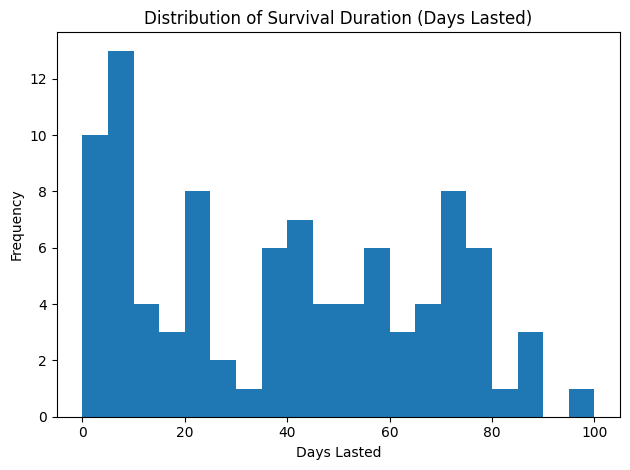

In [11]:
plt.figure()
plt.hist(survivalists['days_lasted'].dropna(), bins=20)
plt.title("Distribution of Survival Duration (Days Lasted)")
plt.xlabel("Days Lasted")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


2.23 Survival Duration by Age and Gender, with Winner Status Highlighted

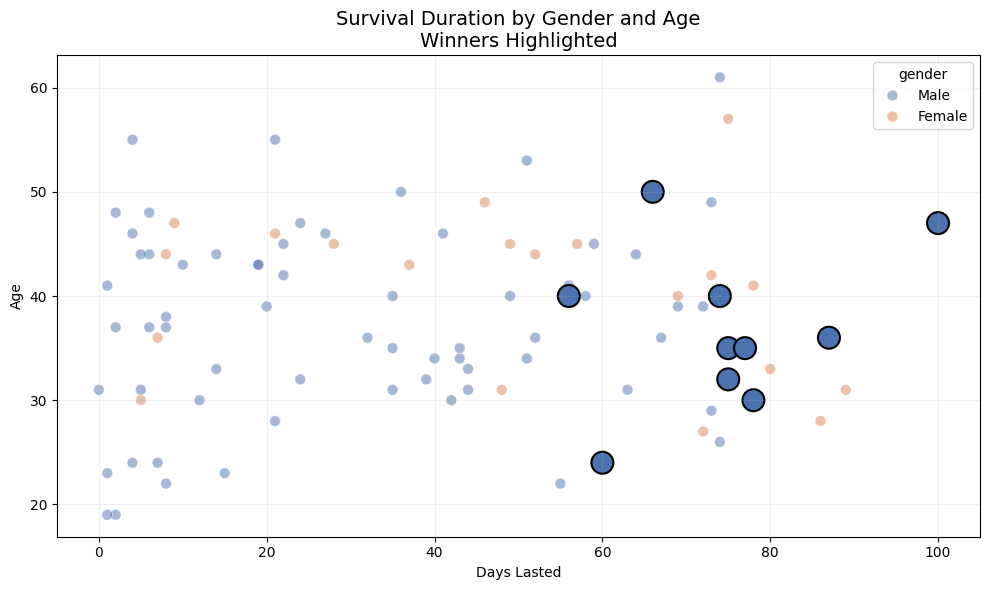

In [12]:
import seaborn as sns

plt.figure(figsize=(10,6))


non_winners = survivalists[survivalists['winner'] == False]
sns.scatterplot(
    data=non_winners,
    x='days_lasted',
    y='age',
    hue='gender',
    palette={'Male':'#4C72B0','Female':'#DD8452'},
    alpha=0.5,
    s=60,
    legend='brief'
)


winners = survivalists[survivalists['winner'] == True]
sns.scatterplot(
    data=winners,
    x='days_lasted',
    y='age',
    hue='gender',
    palette={'Male':'#4C72B0','Female':'#DD8452'},
    s=250,
    edgecolor='black',
    linewidth=1.5,
    legend=False
)

plt.title("Survival Duration by Gender and Age\nWinners Highlighted", fontsize=14)
plt.xlabel("Days Lasted")
plt.ylabel("Age")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


2.24 Top 10 Professions of Survivalists

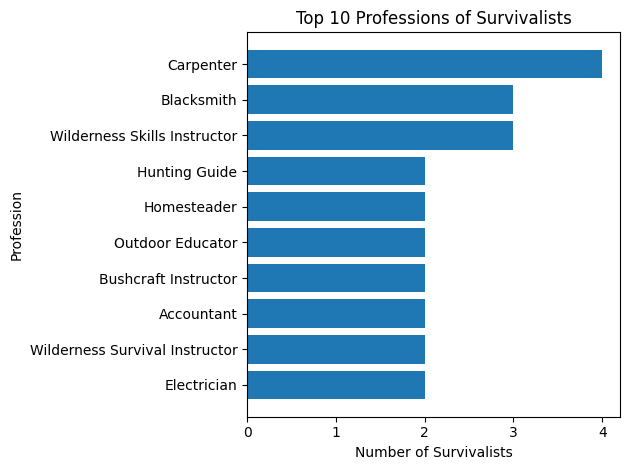

In [13]:
top_professions = (
    survivalists['profession']
    .value_counts()
    .head(10)
    .sort_values()
)

plt.figure()
plt.barh(top_professions.index, top_professions.values)
plt.xlabel("Number of Survivalists")
plt.ylabel("Profession")
plt.title("Top 10 Professions of Survivalists")
plt.tight_layout()
plt.show()

### 2.3 Loadouts

2.31 Loadouts Basic Info

In [ ]:
loadouts.shape
loadouts.info()

2.32  Loadouts item counts

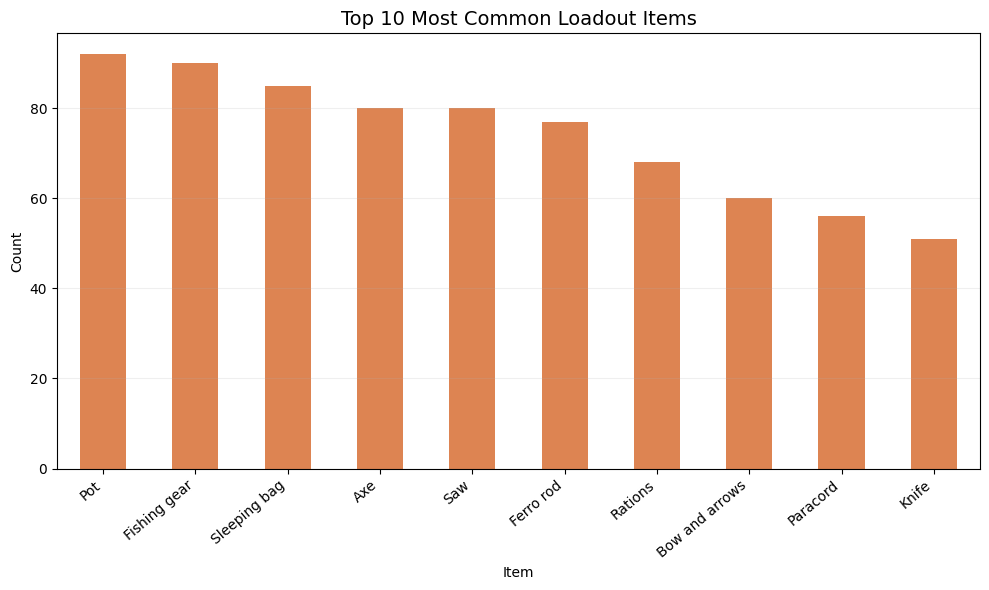

In [14]:
plt.figure(figsize=(10,6))
top_items = loadouts['item'].value_counts().head(10)

top_items.plot(kind='bar', color='#DD8452')
plt.title("Top 10 Most Common Loadout Items", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Item")
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


2.33 Item Co-occurrence Heatmap

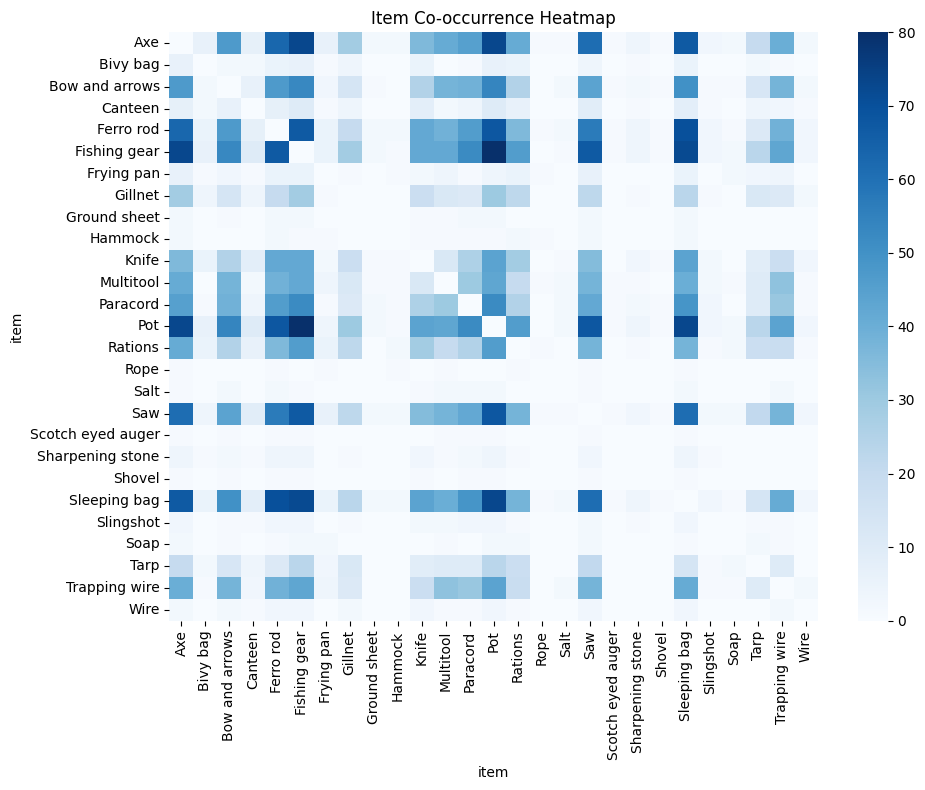

In [15]:
import numpy as np

binary_matrix = (
    loadouts
    .assign(value=1)
    .pivot_table(
        index='name',
        columns='item',
        values='value',
        fill_value=0
    )
)

co_occurrence = binary_matrix.T @ binary_matrix

np.fill_diagonal(co_occurrence.values, 0)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, cmap="Blues")
plt.title("Item Co-occurrence Heatmap")
plt.tight_layout()
plt.show()

### 2.4 episodes

2.41 episodes basic info

In [16]:
episodes.shape
episodes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   version                 98 non-null     object        
 1   season                  98 non-null     int64         
 2   episode_number_overall  98 non-null     int64         
 3   episode                 98 non-null     int64         
 4   title                   98 non-null     object        
 5   air_date                98 non-null     datetime64[ns]
 6   viewers                 83 non-null     float64       
 7   quote                   98 non-null     object        
 8   author                  98 non-null     object        
 9   imdb_rating             93 non-null     float64       
 10  n_ratings               93 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 8.6+ KB


2.42 Rating Distribution

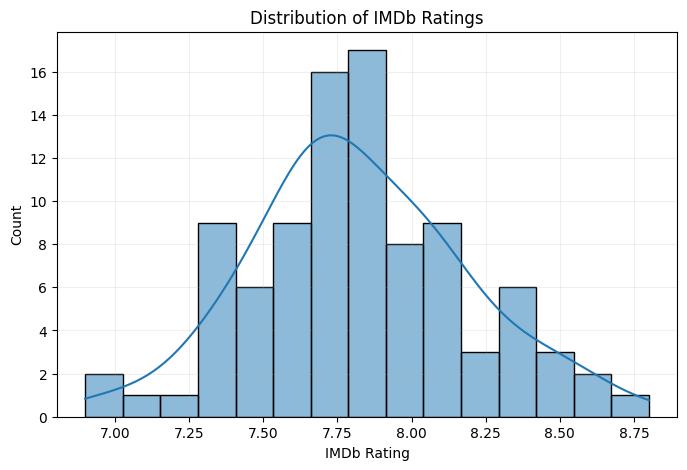

In [17]:


plt.figure(figsize=(8,5))
sns.histplot(episodes['imdb_rating'].dropna(), bins=15, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.grid(alpha=0.2)
plt.show()


2.43 Distribution of Episode Viewership

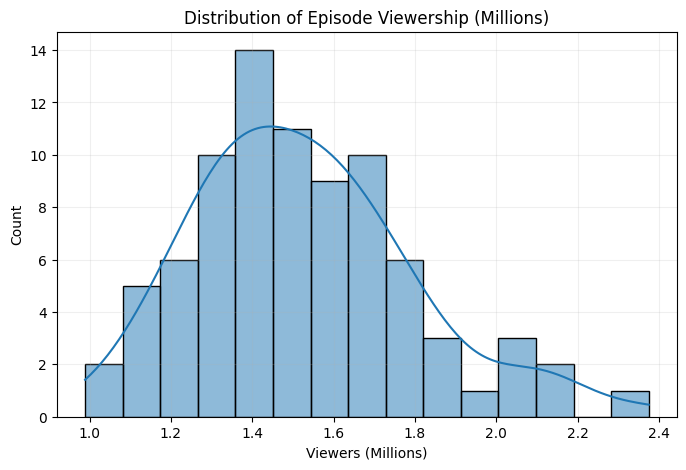

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(episodes['viewers'].dropna(), bins=15, kde=True)
plt.title("Distribution of Episode Viewership (Millions)")
plt.xlabel("Viewers (Millions)")
plt.ylabel("Count")
plt.grid(alpha=0.2)
plt.show()


### 2.5 seasons

2.51 seasons basic info

In [19]:
seasons.shape
seasons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   version        9 non-null      object        
 1   season         9 non-null      int64         
 2   location       9 non-null      object        
 3   country        9 non-null      object        
 4   n_survivors    9 non-null      int64         
 5   lat            9 non-null      float64       
 6   lon            9 non-null      float64       
 7   date_drop_off  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 708.0+ bytes


2.52 Number of Seasons by Country

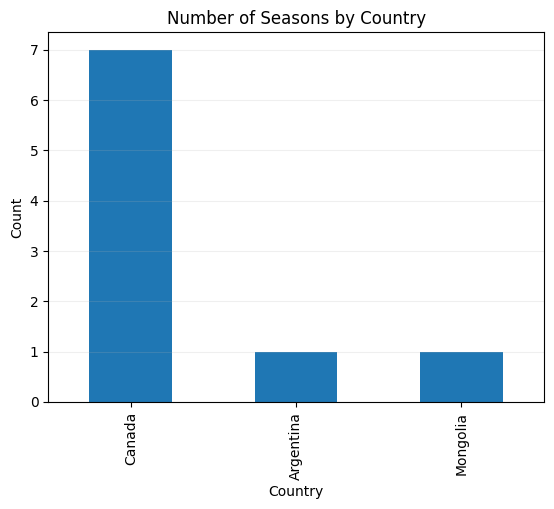

In [25]:
seasons['country'].value_counts().plot(kind='bar')
plt.title("Number of Seasons by Country")
plt.ylabel("Count")
plt.xlabel("Country")
plt.grid(axis='y', alpha=0.2)
plt.show()


2.53 Average Survival Days by Season

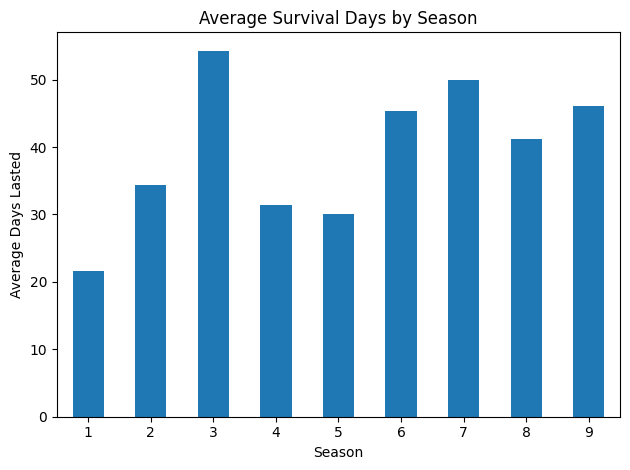

In [26]:
season_avg_days = (
    survivalists
    .groupby('season')['days_lasted']
    .mean()
    .sort_index()
)

plt.figure()
season_avg_days.plot(kind='bar')
plt.xlabel("Season")
plt.ylabel("Average Days Lasted")
plt.title("Average Survival Days by Season")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

2.54 Exit Reason Distribution by Season

<Figure size 640x480 with 0 Axes>

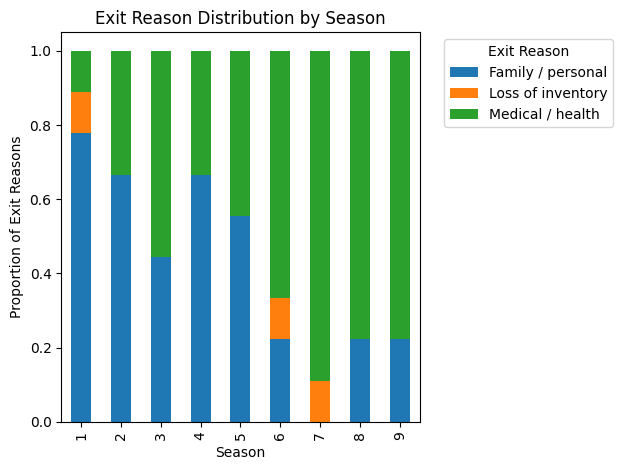

In [27]:
exit_dist = (
    pd.crosstab(
        survivalists['season'],
        survivalists['reason_category'],
        normalize='index'
    )
)

plt.figure()
exit_dist.plot(kind='bar', stacked=True)
plt.xlabel("Season")
plt.ylabel("Proportion of Exit Reasons")
plt.title("Exit Reason Distribution by Season")
plt.legend(title="Exit Reason", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()